In [3]:
# Importing required libraries
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 


/var/folders/4j/wqkxszcs5jl9436sl4hsmprh0000gn/T/ipykernel_78775/2359636322.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
#Loading Dataset
import csv
# Read the 3 different csv files 
books = pd.read_csv('/Users/rabin/College_Project_Seven/Books.csv', low_memory=False)
ratings = pd.read_csv('/Users/rabin/College_Project_Seven/Ratings.csv', encoding='latin-1', delimiter=';')
users = pd.read_csv('/Users/rabin/College_Project_Seven/Users.csv', encoding='latin-1', delimiter=';')


In [5]:
books.shape

(271360, 8)

In [6]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [7]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-L']]

Rename of Books

In [8]:
books.rename(columns={
    "Book-Title": "title",
    "Year-Of-Publication" : "year",
    "Book-Author" : "author",
    "Publisher" : "publisher",
    "Image-URL-L": "img_url"},
             inplace=True)

In [9]:
books.head()

,ISBN,title,author,year,publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [10]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
ratings.rename(columns={
    "User-ID": "user_id",
    "Book-Rating": "rating"},
             inplace=True)

In [12]:
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [13]:
ratings['user_id'].unique().shape

(105283,)

In [14]:
x = ratings['user_id'].value_counts() >200

In [15]:
x[x].shape

(899,)

In [16]:
y = x[x].index

In [17]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='user_id', length=899)

In [18]:
ratings = ratings[ratings['user_id'].isin(y)]

In [19]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [20]:
ratings.shape

(526356, 3)

In [21]:
# ratings_with_books


In [22]:
ratings_with_books = ratings.merge(books, on= "ISBN")

In [23]:
ratings_with_books.shape

(487671, 8)

In [24]:
num_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [25]:
num_rating.shape

(160269, 2)

In [26]:
num_rating.rename(columns={"rating": "num_of_rating"},inplace = True)

In [27]:
num_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [28]:
final_rating = ratings_with_books.merge(num_rating, on='title')

In [29]:
final_rating.head(3)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,1


In [30]:

final_rating.shape


(487671, 9)

In [31]:
# Display books with rating more than 50
final_rating = final_rating[final_rating['num_of_rating']>=50]


In [32]:
final_rating.sample(1)

,user_id,ISBN,rating,title,author,year,publisher,img_url,num_of_rating
252720,147141,0375727345,0,House of Sand and Fog,Andre Dubus III,2000,Vintage Books,http://images.amazon.com/images/P/0375727345.0...,174


In [33]:
final_rating.shape

(61853, 9)

In [34]:
# remove duplicate 
final_rating.drop_duplicates(['title', 'user_id'],inplace=True)

In [35]:
final_rating.shape

(59850, 9)

In [36]:

book_pivot = final_rating.pivot_table(columns='user_id', index='title',values='rating') 

In [37]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [38]:
book_pivot.shape

(742, 888)

In [39]:
book_pivot.fillna(0, inplace=True)

In [40]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
import numpy as np

# Function to compute Euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2)**2))

# Compute pairwise distances between rows using Euclidean distance
num_rows = book_pivot.shape[0]
distance_matrix = np.zeros((num_rows, num_rows))

for i in range(num_rows):
    for j in range(i+1, num_rows):
        distance = euclidean_distance(book_pivot.iloc[i].values, book_pivot.iloc[j].values)
        # Since the distance matrix is symmetric, we can assign the same value for distance_matrix[j, i]
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

# distance_matrix[i, j] will give the Euclidean distance between row i and row j


In [42]:
distance_matrix

array([[ 0.        , 67.16397844, 66.41535967, ..., 53.38539126,
        50.84289528, 60.94259594],
       [67.16397844,  0.        , 63.30876717, ..., 58.83026432,
        53.4976635 , 61.22907806],
       [66.41535967, 63.30876717,  0.        , ..., 55.29014379,
        51.38093031, 58.94913061],
       ...,
       [53.38539126, 58.83026432, 55.29014379, ...,  0.        ,
        36.81032464, 50.15974482],
       [50.84289528, 53.4976635 , 51.38093031, ..., 36.81032464,
         0.        , 43.89760814],
       [60.94259594, 61.22907806, 58.94913061, ..., 50.15974482,
        43.89760814,  0.        ]])

In [43]:
distance_matrix.shape

(742, 742)

In [44]:
# Find nearest neighbors for each row
nearest_indices = {}
k = 6
for i in range(num_rows):
    # Sort distances for the current row
    nearest_indices[i] = np.argsort(distance_matrix[i])[:k]

# nearest_indices[i] will give the indices of the k nearest neighbors for row i


In [45]:
distances = distance_matrix


In [46]:
# Let's say nearest_indices is already computed and contains the indices of nearest neighbors for each row
# Assuming nearest_indices is a dictionary where each key represents a row index and the value is an array of indices of nearest neighbors
# Let's say we want to print the titles of recommended books for each row

for i in range(len(nearest_indices)):
    print("Recommended books for:", book_pivot.index[i])
    for j in nearest_indices[i]:
        print("- ", book_pivot.index[j])
    print()  # Adding a blank line for better readability


Recommended books for: 1984
-  1984
-  No Safe Place
-  Long After Midnight
-  A Civil Action
-  Abduction
-  Master of the Game

Recommended books for: 1st to Die: A Novel
-  1st to Die: A Novel
-  Exclusive
-  The Cradle Will Fall
-  No Safe Place
-  Fine Things
-  The Face of Deception

Recommended books for: 2nd Chance
-  2nd Chance
-  The Next Accident
-  The Ghost
-  Exclusive
-  Last Man Standing
-  Unspeakable

Recommended books for: 4 Blondes
-  4 Blondes
-  No Safe Place
-  Pleading Guilty
-  Long After Midnight
-  Exclusive
-  Lake Wobegon days

Recommended books for: 84 Charing Cross Road
-  84 Charing Cross Road
-  Exclusive
-  Jacob Have I Loved
-  Alaska
-  No Safe Place
-  The Little Friend

Recommended books for: A Bend in the Road
-  A Bend in the Road
-  Exclusive
-  The Cradle Will Fall
-  No Safe Place
-  Family Album
-  Last Man Standing

Recommended books for: A Case of Need
-  A Case of Need
-  Exclusive
-  Jacob Have I Loved
-  Pleading Guilty
-  No Safe Place


In [47]:
book_pivot.index[3]

'4 Blondes'

In [48]:
book_pivot.index


Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=742)

In [49]:
book_name = book_pivot.index

In [50]:
# import pickle
# # pickle.dump(model, open('/Users/rabin/College_Project_Seven/artifacts_no/model.pkl', 'wb'))
# pickle.dump(book_name, open('/Users/rabin/College_Project_Seven//artifacts_no/book_name.pkl', 'wb'))
# pickle.dump(final_rating, open('/Users/rabin/College_Project_Seven//artifacts_no/final_rating.pkl','wb'))
# pickle.dump(book_pivot, open('/Users/rabin/College_Project_Seven//artifacts_no/book_pivot.pkl','wb'))

In [70]:
# def recommend_book(book_name):
#     book_id = np.where(book_pivot.index == book_name)[0][0]
#     distances, nearest_indices = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1), n_neighbors=6)

#     for i in range(len(nearest_indices)):
#         books = book_pivot.index[nearest_indices[i]]
#         for j in books:
#             print(j)


In [87]:
book_name = '1984'  # Replace '2nd Chance' with the actual book name provided by the user

# Check if the provided book name exists in the index of the pivot table
if book_name in book_pivot.index:
    # Find the index of the provided book name in the pivot table
    book_index = book_pivot.index.get_loc(book_name)
    # Check if recommendations exist for the provided book index
    if book_index in nearest_indices:
        # Print the recommended books for the given book name
        print("Recommended books for:", book_name)
        # Loop through nearest indices and print recommended books
        for j in nearest_indices[book_index]:
            if j != book_index:  # Skip printing the provided book itself
                print("- ", book_pivot.index[j])
    else:
        print("No recommendations available for", book_name)
else:
    print("Book not found in the dataset.")


Recommended books for: 1984
-  No Safe Place
-  Long After Midnight
-  A Civil Action
-  Abduction
-  Master of the Game


In [80]:
def recommend_books(book_name, book_pivot, nearest_indices):
    """
    Function to recommend books based on the provided book name.

    Parameters:
    - book_name (str): The name of the book for which recommendations are sought.
    - book_pivot (DataFrame): The pivot table containing book data.
    - nearest_indices (dict): Dictionary containing indices of nearest neighbors for each row.


    Returns:
    - None
    """
    if book_name in book_pivot.index:
        book_index = book_pivot.index.get_loc(book_name)
        if book_index in nearest_indices:
            print("Recommended books for:", book_name)
            for j in nearest_indices[book_index]:
                if j != book_index:
                    print("- ", book_pivot.index[j])
        else:
            print("No recommendations available for", book_name)
    else:
        print("Book not found in the dataset.")
# Example usage:
book_names = 'Animal Farm'
recommend_books(book_names, book_pivot, nearest_indices)


Recommended books for: Animal Farm
-  Exclusive
-  Jacob Have I Loved
-  Second Nature
-  Pleading Guilty
-  No Safe Place


In [75]:
# Example usage:
book_names = '1984'
recommend_books(book_names, book_pivot, nearest_indices)


Recommended books for: 1984
-  No Safe Place
-  Long After Midnight
-  A Civil Action
-  Abduction
-  Master of the Game


In [84]:


#Merged
import numpy as np

# Function to compute Euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2)**2))

# Compute pairwise distances between rows using Euclidean distance
num_rows = book_pivot.shape[0]
distance_matrix = np.zeros((num_rows, num_rows))

for i in range(num_rows):
    for j in range(i+1, num_rows):
        distance = euclidean_distance(book_pivot.iloc[i].values, book_pivot.iloc[j].values)
        # Since the distance matrix is symmetric, we can assign the same value for distance_matrix[j, i]
        distance_matrix[i, j] = distance
        distance_matrix[j, i] = distance

# distance_matrix[i, j] will give the Euclidean distance between row i and row j
# Find nearest neighbors for each row
nearest_indices = {}
k = 6
for i in range(num_rows):
    # Sort distances for the current row
    nearest_indices[i] = np.argsort(distance_matrix[i])[:k]

# nearest_indices[i] will give the indices of the k nearest neighbors for row i



def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distances, nearest_indices = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1), n_neighbors=6)

    for i in range(len(nearest_indices)):
        books = book_pivot.index[nearest_indices[i]]
        for j in books:
            print(j)
book_name = 'The Lake House'  # Replace '2nd Chance' with the actual book name provided by the user

# Check if the provided book name exists in the index of the pivot table
if book_name in book_pivot.index:
    # Find the index of the provided book name in the pivot table
    book_index = book_pivot.index.get_loc(book_name)
    # Check if recommendations exist for the provided book index
    if book_index in nearest_indices:
        # Print the recommended books for the given book name
        print("Recommended books for:", book_name)
        # Loop through nearest indices and print recommended books
        for j in nearest_indices[book_index]:
            if j != book_index:  # Skip printing the provided book itself
                print("- ", book_pivot.index[j])
    else:
        print("No recommendations available for", book_name)
else:
    print("Book not found in the dataset.")


Book not found in the dataset.


Accuracy Testing

In [57]:

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [58]:
# Define feature matrix X and target vector y
X = final_rating.drop(columns=['rating'])
X = pd.get_dummies(X) # Encode categorical variables as dummy variables
y = final_rating['rating']

In [59]:
# Instantiate decision tree classifier and perform cross-validation
dtree = DecisionTreeClassifier()
scores = cross_val_score(dtree, X, y, scoring='accuracy', cv=7)
mean_score = np.mean(scores)
std_score = np.std(scores)

In [60]:
mean_score

0.11144527986633249

In [61]:
scores

array([0.0354386 , 0.09146199, 0.03087719, 0.09555556, 0.19497076,
       0.02421053, 0.30760234])

In [62]:
std_score

0.09708909592953083

In [63]:
# Print results
print(f"Mean accuracy: {mean_score:.5f}")
print(f"Standard deviation: {std_score:.5f}")

Mean accuracy: 0.11145
Standard deviation: 0.09709


calculate the precision, recall, and F1 score


In [64]:
# Define feature matrix X and target vector y
from sklearn.model_selection import train_test_split
X = final_rating.drop(columns=['rating'])
X = pd.get_dummies(X) # Encode categorical variables as dummy variables
y = final_rating['rating']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that column names in X_train and X_test are the same
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Reshape y_train and y_test to have a second dimension
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Fit the decision tree classifier on the training set
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Reshape y_pred to have a second dimension
y_pred = y_pred.reshape(-1, 1)

In [65]:

from sklearn.metrics import classification_report

# Calculate precision, recall, and F1 score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.86      0.82      8949
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00        41
           5       0.32      0.23      0.27       286
           6       0.05      0.03      0.04       177
           7       0.08      0.06      0.07       426
           8       0.14      0.09      0.11       724
           9       0.11      0.08      0.10       617
          10       0.28      0.21      0.24       706

    accuracy                           0.68     11970
   macro avg       0.16      0.14      0.15     11970
weighted avg       0.63      0.68      0.65     11970



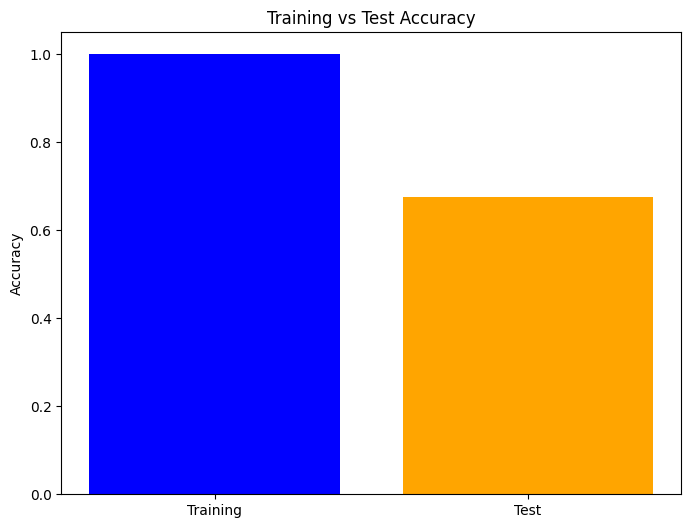

In [66]:
from sklearn.metrics import accuracy_score

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, dtree.predict(X_train))

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Test'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title('Training vs Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

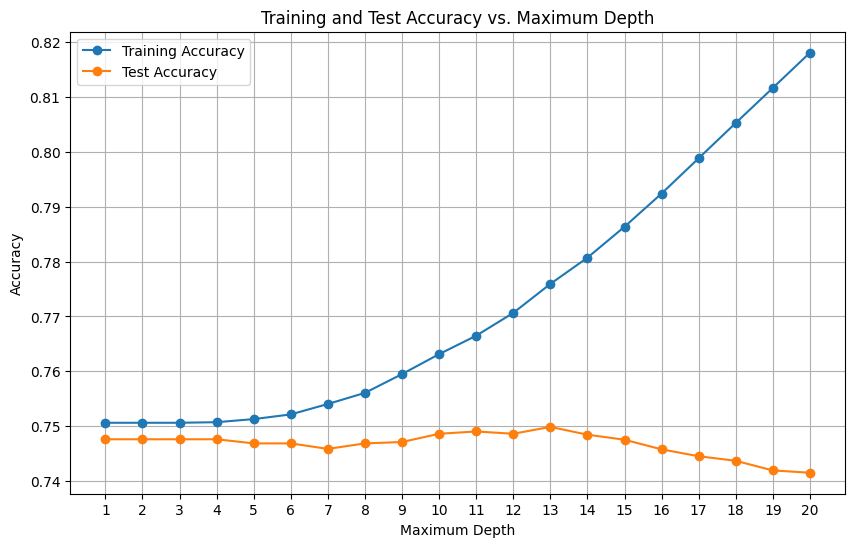

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Define a range of maximum depths to test
max_depths = range(1, 21)  # Adjust the range as needed

# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Iterate over each maximum depth
for max_depth in max_depths:
    # Instantiate the decision tree classifier with the current maximum depth
    dtree = DecisionTreeClassifier(max_depth=max_depth)
    
    # Fit the classifier on the training set
    dtree.fit(X_train, y_train)
    
    # Make predictions on the training set
    y_train_pred = dtree.predict(X_train)
    
    # Make predictions on the test set
    y_test_pred = dtree.predict(X_test)
    
    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Training and Test Accuracy vs. Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()
